# Hand Classification 

In [1]:
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
# Add the project root directory to the Python path
sys.path.append('../')

from src.utils.config import MODEL_DIR, DATA_DIR

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

In [2]:
# Load Model
model = load_model(MODEL_DIR / 'hand_classification.h5')

In [3]:
def preprocess_frame(frame):
    """
    Preprocesses a single video frame to match the model's input requirements.
    """
    # Resize the frame to the target dimensions
    img = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))
    img = img / 255.0

    # --- IMPORTANT: Add a batch dimension ---
    # The shape should go from (height, width, channels) to (1, height, width, channels).
    img = np.expand_dims(img, axis=0)

    return img

In [4]:
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
thickness = 1
padding = 10

def image_classification(image_path):
    # Normal Hand classification
    
    image = cv2.imread((DATA_DIR / image_path).as_posix())
 
    rgb_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    preprocessed_frame = preprocess_frame(rgb_frame)
    prediction = model.predict(preprocessed_frame)
    score = prediction[0][0]
    if score > 0.5:
        label = "Class A - Normal"
        colour = (0, 255, 0)
    else:
        label = "Class B - Abnormal"
        colour = (255, 0, 0)
        
    (text_width, text_height), baseline = cv2.getTextSize(label, font, font_scale, thickness)
    image_height, image_width, _ = image.shape
    text_x = image_width - text_width - padding
    text_y = text_height + padding

    cv2.putText(rgb_frame, label, (text_x, text_y), font, font_scale, colour, thickness)
    plt.imshow(rgb_frame)
    plt.axis('off')  # Optional: Hides the axis ticks and labels
    plt.show()

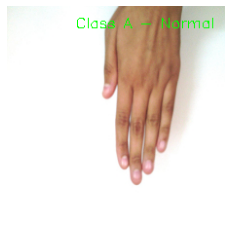

In [5]:
# Normal Hand classification
image_classification("normal.jpg")

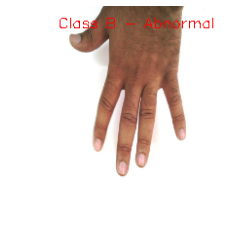

In [6]:
image_classification("abnormal_2.jpg")

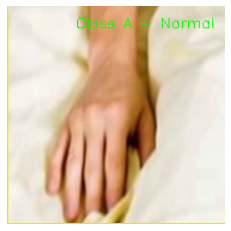

In [7]:
image_classification("normal_2.jpg")

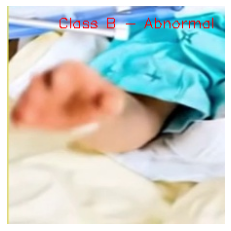

In [8]:
image_classification("abnormal_3.jpg")

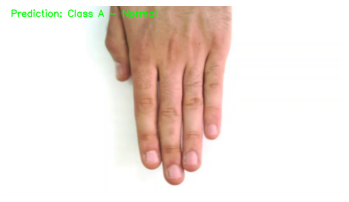

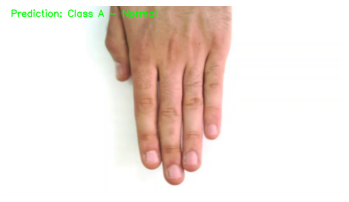

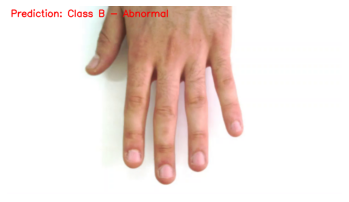

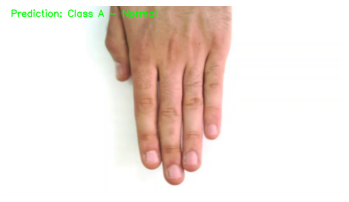

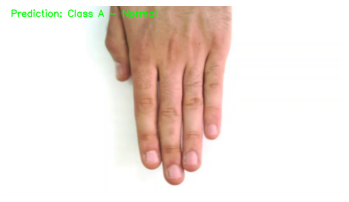

In [9]:
# Start video capture from the file
input_video = 'hand_classification.mp4'
cap = cv2.VideoCapture((DATA_DIR / input_video).as_posix())
frame_count = 0
while True:
    # Read one frame from the video
    ret, frame = cap.read()
    # If 'ret' is False, the video has ended or there was an error
    if not ret:
        break
    frame_count += 1
    # --- Preprocess and Predict ---
    # Convert the frame from BGR (OpenCV's default) to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    preprocessed_frame = preprocess_frame(rgb_frame)

    if preprocessed_frame is not None:
        # Get the model's prediction
        prediction = model.predict(preprocessed_frame)
        
        # --- Interpret and Display Output ---
        # Example for a binary classification model
        score = prediction[0][0]
        if score > 0.5:
            label = "Class A - Normal"
            color = (0, 255, 0) # Green for Class A
        else:
            label = "Class B - Abnormal"
            color = (255, 0, 0) # Red for Class B
        
        # Add the text label to the frame
        cv2.putText(rgb_frame, f"Prediction: {label}", (10, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    
    # Display at 30 FPS
    if frame_count % 30 == 0:
        plt.imshow(rgb_frame)
        plt.axis('off')  # Optional: Hides the axis ticks and labels
        plt.show()

# --- 5. Cleanup ---
# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()